<a href="https://colab.research.google.com/github/wendyseal/AI-machine-learning/blob/main/Boston_DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

看模型表現$ r^2 $，來回頭調整參數。


MSE=mean squared error
和平均的平均距離

範例：
$MSE=\dfrac{1}{2}[(30-20)^2+(10-20)^2]$


$ r^2 = 1-\dfrac{a}{b}$ <br /> 
(0.5以上預估的還不錯)

$\dfrac{a}{b}=$ $\dfrac{估計值(認真猜)}{瞎猜}$

0 a=0 準<br />
1 a=b 每一個平均值都跟預估值一樣 (瞎猜)<br />

認真猜：每一個預估值，與正確值的差距。<br />
瞎猜：如果每一個預估值都當成平均值，與正確值的差距(準度)。




$MSE=\dfrac{1}{n}[(預測值-正確值)^2]$ 
對錯誤給較大的懲罰

$RMSE= \sqrt{\dfrac{1}{n}[(預測值-正確值)^2]} $

$MAE=\dfrac{1}{n}\left| 預測值-正確值\right| $



In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["answer"] = boston["target"]
# df.to_csv("boston.csv", encoding="utf8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston["data"], boston["target"], test_size=0.1)

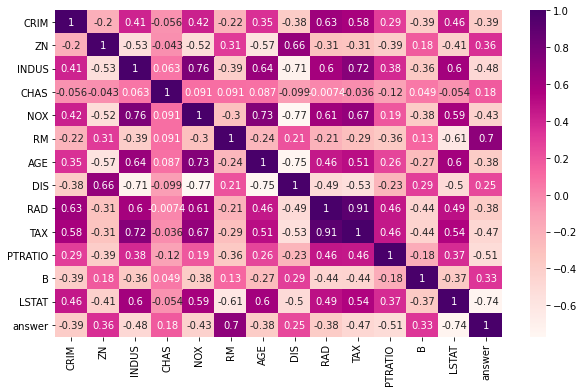

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(df.astype(float).corr(), cmap="RdPu", annot=True)
# Choosing Colormaps in Matplotlib

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化碳濃度（千萬分之一）

RM：住宅的平均房間數

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士顿就業中心的加權距離

RAD：到高速公路的便捷度指數

TAX：每萬元的房產稅率

PTRATIO：城镇學生教師比例

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

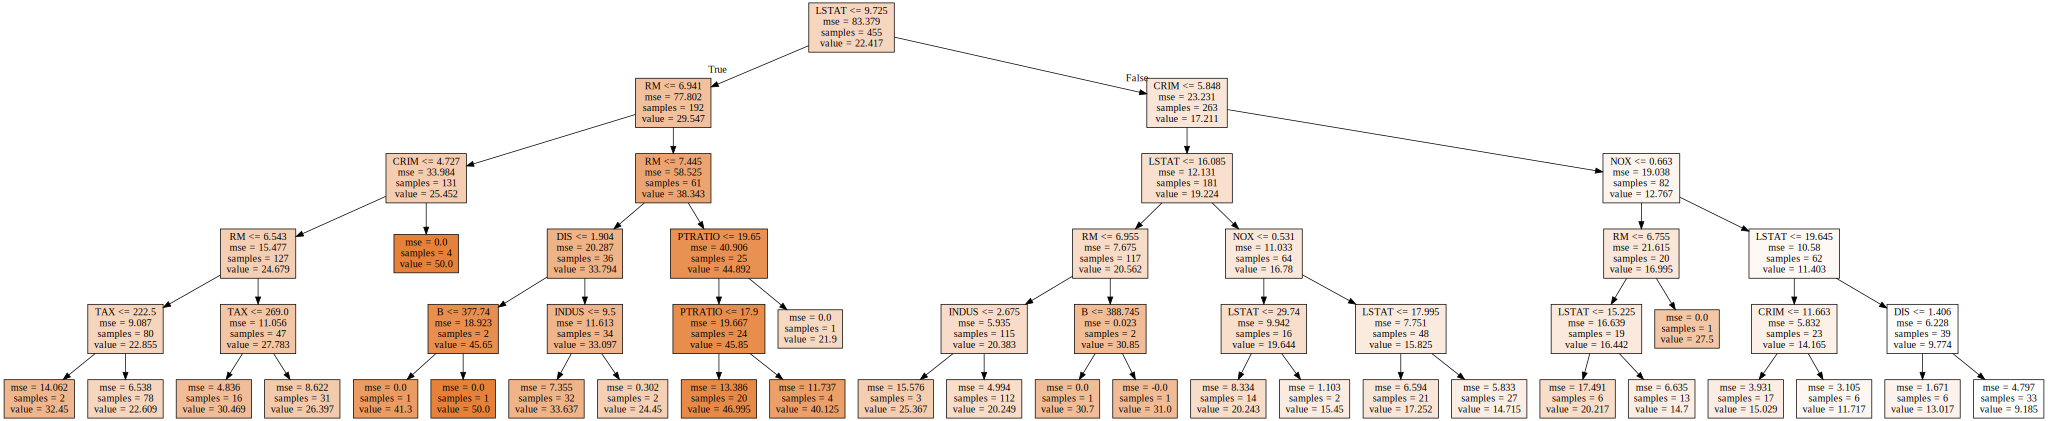

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, out_file=None, feature_names=boston["feature_names"], filled=True)
graphviz.Source(g)

落在哪個區間，回答該區間的平均值

In [ ]:
print("預測結果:",list(reg.predict(x_test)))
print("正確結果:",list(y_test))
from sklearn.metrics import r2_score
pre=reg.predict(x_test)
r2_score(y_test,pre)

預測結果: [20.249107142857145, 20.249107142857145, 14.714814814814819, 20.249107142857145, 14.700000000000005, 20.249107142857145, 20.249107142857145, 46.99499999999999, 20.249107142857145, 22.608974358974358, 46.99499999999999, 20.249107142857145, 22.608974358974358, 9.184848484848484, 14.714814814814819, 30.7, 50.0, 22.608974358974358, 15.029411764705884, 20.249107142857145, 20.216666666666665, 26.396774193548385, 14.714814814814819, 20.249107142857145, 27.5, 22.608974358974358, 20.249107142857145, 33.637499999999996, 9.184848484848484, 30.46875, 17.252380952380957, 33.637499999999996, 20.249107142857145, 14.714814814814819, 33.637499999999996, 14.714814814814819, 22.608974358974358, 46.99499999999999, 22.608974358974358, 46.99499999999999, 26.396774193548385, 46.99499999999999, 20.249107142857145, 20.249107142857145, 15.029411764705884, 15.029411764705884, 20.249107142857145, 50.0, 20.249107142857145, 20.216666666666665, 22.608974358974358]
正確結果: [24.3, 19.7, 13.4, 18.2, 12.0, 20.5, 23.

0.6547591417363288